## Correlation betas AN with Enigma

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from enigmatoolbox.utils.parcellation import parcel_to_surface
from enigmatoolbox.plotting import plot_subcortical
from enigmatoolbox.plotting import plot_cortical
from sklearn.linear_model import LinearRegression
import random

In [2]:
data_dir = '/Users/ltran/Documents/Data/'

In [3]:
enig = pd.read_csv(os.path.join(data_dir, 'TCA_vol/enigma_CT_SA_ASD.csv'), sep = ';')

In [ ]:
df = pd.read_csv(os.path.join(data_dir, 'Outputs/df_tsa_tca.csv'), sep = ',')

In [ ]:
# Extract ROIs names
thick = [col for col in df.columns if '_thickness' in col]
thick.remove('lh_MeanThickness_thickness')
thick.remove('rh_MeanThickness_thickness')
len(thick)

In [ ]:
# Redfine labels


df.loc[df.ASD == 'Relative', 'ASD'] = 'No'



df.loc[df.ASD == 'TCA_pr', 'ASD'] = 'TCA'
df.loc[df.ASD == 'TCA_ac', 'ASD'] = 'TCA'

# Select only TCA and TD
df = df[df.ASD.isin(['TCA', 'No'])]

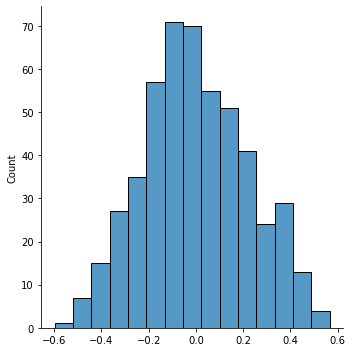

In [4]:
# Bootstrap correlations
r = []
b_tca = []
for i in range(500):
    temp = df.reset_index(drop = True)
    temp_tca = pd.concat([temp.drop(columns='ASD'), temp['ASD'].sample(frac = 1 ).reset_index(drop = True)], axis = 1)
    X = temp_tca[['age_at_scan', 'Sex', 'Protocole', 'scanner', 'ASD']]
    X = pd.get_dummies(X, columns=['Sex', 'Protocole', 'scanner', 'ASD'], drop_first=True)
    X = pd.concat([np.power(temp_tca.age_at_scan, 2), X], axis = 1)
    Y = temp_tca[thick]
    
    
    
    reg = LinearRegression().fit(X, Y)
    

    beta_tca = pd.DataFrame(reg.coef_, columns=['age2', 'age_at_scan', 'Sex', 'Protocole', 'scanner', 'ASD'])['ASD']
    b_tca.append(beta_tca)

    r.append(stats.pearsonr(beta_tca, enig['CT_withGlobal'])[0])

sns.displot(r)